In [11]:
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
from sklearn.linear_model import LinearRegression  # For linear regression
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation


In [12]:
# Load training and testing data
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [20]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Add more features
features = ['LotArea', 'GrLivArea', 'OverallQual', 'MSSubClass', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'YearBuilt']

# Impute missing values
imputer = SimpleImputer(strategy='median')
train_data[['LotFrontage', 'MasVnrArea']] = imputer.fit_transform(train_data[['LotFrontage', 'MasVnrArea']])

X = train_data[features]
y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_poly)
print("R-squared:", r2_score(y_test, y_pred))



R-squared: 0.8735507854202695


In [23]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Log transform the SalePrice to handle large price discrepancies
train_data['LogSalePrice'] = np.log(train_data['SalePrice'])

# Add more features
features = ['LotArea', 'GrLivArea', 'OverallQual', 'MSSubClass', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'YearBuilt', 
            'TotRmsAbvGrd', 'BsmtFinSF1', 'LotArea_GrLivArea', 'GrLivArea_OverallQual']

# Handle missing values
imputer = SimpleImputer(strategy='median')
train_data_imputed = imputer.fit_transform(train_data[features])

# Prepare data
X = train_data_imputed
y = train_data['LogSalePrice']  # Use the log-transformed target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add polynomial features
poly = PolynomialFeatures(degree=2)  # Degree 2 to reduce complexity
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Use Ridge regression with cross-validation
model = Ridge(alpha=10)
model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_poly)

# Convert predictions back to the original scale (exponentiate the log-transformed predictions)
y_pred_original = np.exp(y_pred)

# R-squared and performance metrics
print("R-squared:", r2_score(np.exp(y_test), y_pred_original))  # Evaluate on the original scale


R-squared: 0.8747094318806952


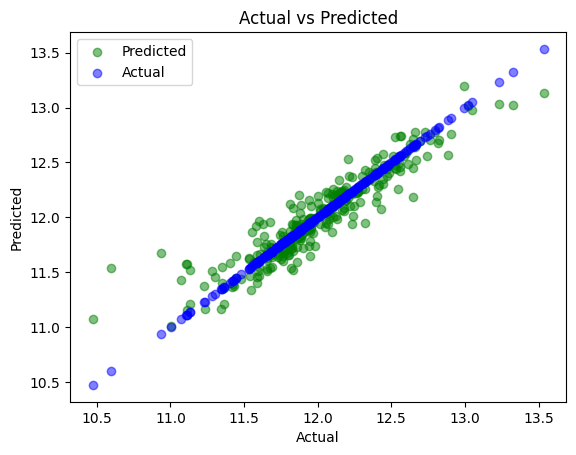

In [24]:

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values with custom colors
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Predicted')
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')  # You could use a different marker or label here

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()

plt.show()
